<h2>Analyse en composantes principales</h2>

<h3>Importation des données</h3>

In [19]:
import pandas as pd
#chargement de la première feuille de données
data = pd.read_csv("villes.csv", delimiter=";", encoding='latin-1', header=0, index_col=0)
#matric shape
data.shape
#suppression des quatre dernière ligne
data=data.dropna()
data.drop(columns=["Latitude", "Longitude", "Géographie"],inplace=True)
#Nombre d'observations
n = data.shape[0]
#Nombre de variables
p = data.shape[1]
data.head(5)

,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,...,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Précipitations de mai à aout,Précipitations sept-oct
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,...,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,13.9,25.8
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,...,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,29.0,30.8
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,...,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,29.9,31.0
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,...,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,35.8,35.5
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,...,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,26.0,36.8


<h3>Préparation des données</h3>

<h4>Centrage et réduction</h4>

In [14]:
import sklearn
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation 
sc = StandardScaler() 
#transformation – centrage-réduction
m = sc.fit_transform(data) 
print(m)

[[ 0.54719493  0.49892739 -0.35160018 ...  1.88031208 -2.08607274
  -1.87189519]
 [-0.0218878  -0.60486403  0.25283608 ... -0.42367579 -0.17700011
  -0.91627302]
 [ 0.59097052  0.44083311  0.52147442 ... -0.19630856 -0.06321433
  -0.87804813]
 ...
 [-0.54719493 -0.60486403 -0.28444059 ...  0.03611126  0.34135736
  -0.61047393]
 [-0.10943899 -0.3143926  -0.28444059 ... -0.52472789  0.16435725
  -0.66781126]
 [-0.67852171 -0.89533546 -0.35160018 ... -0.48935965  1.42864376
   1.22432064]]


<h4>Calcul de la moyenne et l'écart-type</h4>

In [15]:
import numpy as np
#moyenne
print(np.mean(m, axis=0))
#écart-type
print(np.std(m, axis=0, ddof=0))

[-2.61228947e-17 -1.46941283e-16  3.42862993e-17 -1.16328515e-16
  2.41636776e-16 -9.79608551e-17 -4.57150657e-17 -1.27349112e-16
  1.42043240e-16 -1.17553026e-16 -1.79594901e-16  1.89390987e-16
 -1.70411071e-16  8.48994078e-17 -3.91843420e-17  3.98374144e-16
 -2.93882565e-17  3.06944013e-16 -9.46954933e-17  1.86125625e-16
 -2.93882565e-17  9.46954933e-17 -1.99187072e-16  6.85725986e-17
  2.74290394e-16 -4.24497039e-16 -6.92256709e-16  9.24097400e-16
  4.76742828e-16 -7.77156117e-16  1.47594355e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]


<h3>Analyse des données en utilisant l'ACP</h3>

<h4>Instanciation et lancement des calculs</h4>

In [16]:
from sklearn.decomposition import PCA 
#instanciation 
acp = PCA(svd_solver='full')
#calculs 
coord = acp.fit_transform(m)
#nombre de composantes calculées
print(acp.n_components_)


31


array([1.63104250e+01, 8.46763961e+00, 3.58463927e+00, 8.92727763e-01,
       3.74093312e-01, 2.55792223e-01, 2.28443994e-01, 1.59833769e-01,
       1.40849258e-01, 1.16177125e-01, 1.01867403e-01, 6.29363401e-02,
       4.98929290e-02, 4.45100594e-02, 4.09553020e-02, 3.01632603e-02,
       2.63692248e-02, 2.36611237e-02, 2.13183279e-02, 1.89832378e-02,
       1.26527449e-02, 1.03863968e-02, 8.58850592e-03, 6.38017773e-03,
       4.88220556e-03, 2.91369764e-03, 1.93877820e-03, 6.72979945e-04,
       3.05972093e-04, 2.57621422e-30, 8.57178859e-32])

<h4>Valeurs propres</h4>

In [17]:
# Variance expliquée
acp.explained_variance_ #les valeurs propres associées aux composantes principales
#Variance expliquée corrigée
val_p = (n-1)/n*acp.explained_variance_ # Calcul des valeurs propres corrigées avec l'expression (n-1)/n
val_p 
#Proportion de variance expliquée
acp.explained_variance_ratio_

array([5.26142742e-01, 2.73149665e-01, 1.15633525e-01, 2.87976698e-02,
       1.20675262e-02, 8.25136202e-03, 7.36916110e-03, 5.15592803e-03,
       4.54352445e-03, 3.74764920e-03, 3.28604527e-03, 2.03020452e-03,
       1.60944932e-03, 1.43580837e-03, 1.32113877e-03, 9.73008398e-04,
       8.50620156e-04, 7.63262054e-04, 6.87687998e-04, 6.12362511e-04,
       4.08153063e-04, 3.35045058e-04, 2.77048578e-04, 2.05812185e-04,
       1.57490502e-04, 9.39902465e-05, 6.25412323e-05, 2.17090305e-05,
       9.87006752e-06, 8.31036844e-32, 2.76509309e-33])

In [20]:
# Liste des composantes principales
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8","CP9","CP10","CP11","CP12","CP13","CP14","CP15","CP16", "CP17","CP18","CP19","CP20","CP21","CP22","CP23","CP24", "CP25","CP26","CP27","CP28","CP29","CP30","CP31"]
df_acp = pd.DataFrame(list_acp, columns = ["ACP"])
df_acp['explained_variance'] = acp.explained_variance_

<Axes: xlabel='explained_variance', ylabel='ACP'>

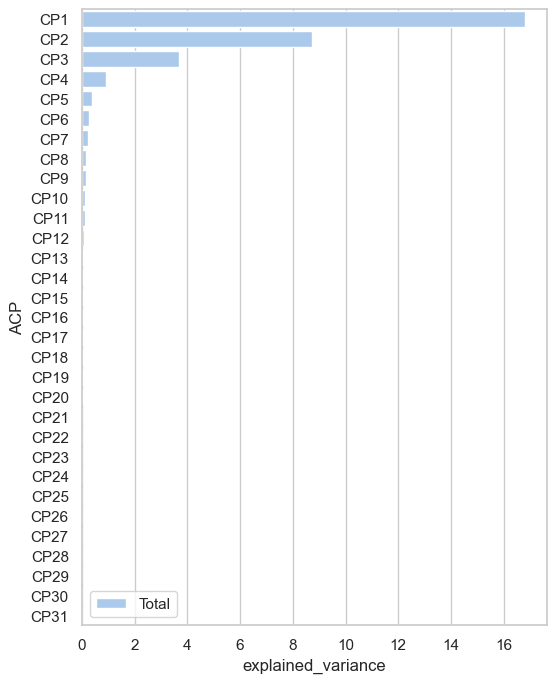

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialisons le graphique matplotlib
f, ax = plt.subplots(figsize=(6, 8))

# Histogramme variance expliquée
sns.set_color_codes("pastel")
sns.barplot(x='explained_variance', y="ACP", data=df_acp,
            label="Total", color="b")

<h3>REPRESENTATION DES INDIVIDUS</h3>

<h4>Représentation des individus dans le premier plan</h4>

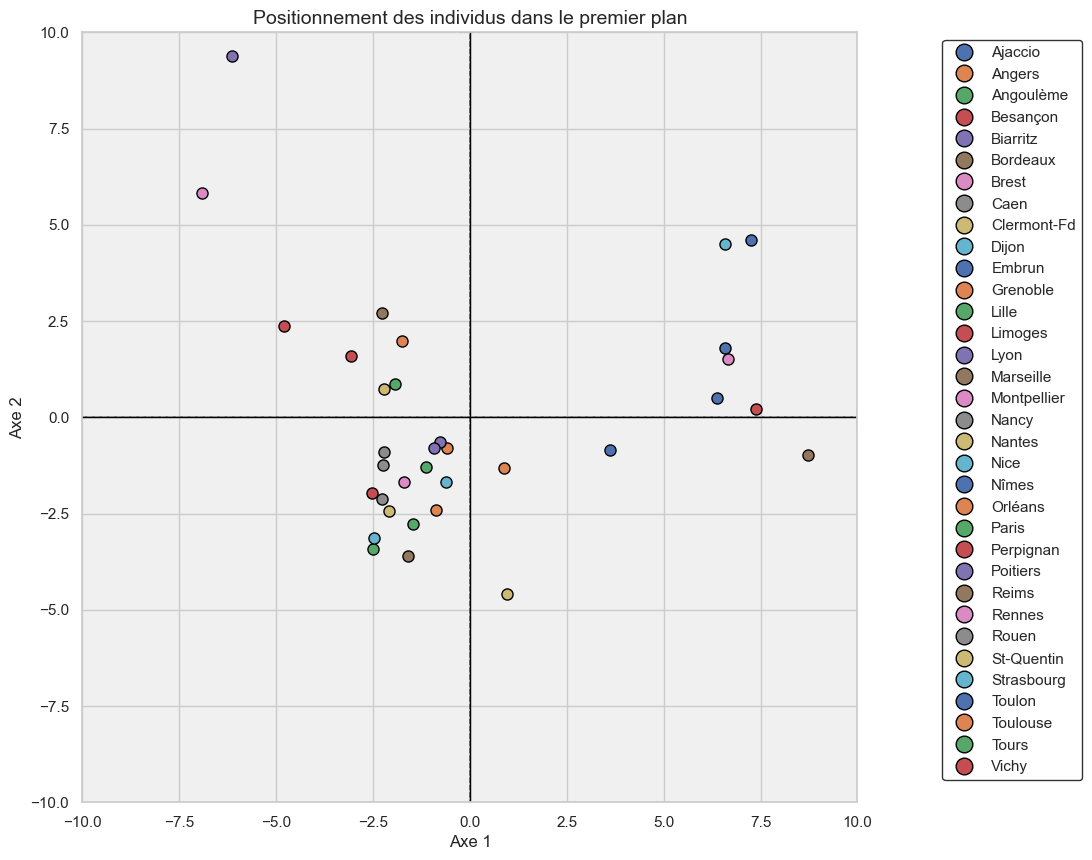

In [30]:
# Positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-10, 10)
axes.set_ylim(-10, 10)

# Ajouter un fond coloré pour le graphique
axes.set_facecolor('#f0f0f0')

# Ajouter des cercles pour mettre en évidence les individus
for i, (x, y) in enumerate(zip(coord[:, 0], coord[:, 1])):
    axes.plot(x, y, 'o', markersize=8, label=data.index[i], markeredgecolor='black', markeredgewidth=1)

# Ajouter des axes avec des flèches
axes.arrow(0, -10, 0, 20, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')
axes.arrow(-10, 0, 20, 0, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')

# Ajouter des lignes d'axe
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.axvline(0, color='black', linestyle='-', linewidth=1)

# Ajouter une légende pour les individus
axes.legend(loc='upper right', bbox_to_anchor=(1.3, 1), markerscale=1.5, frameon=True, edgecolor='black')

# Titres et labels
axes.set_title("Positionnement des individus dans le premier plan", fontsize=14)
axes.set_xlabel("Axe 1", fontsize=12)
axes.set_ylabel("Axe 2", fontsize=12)

# Affichage du graphique
plt.grid(True)
plt.show()

<h4>Représentation des individus dans le deuxième plan<h4>

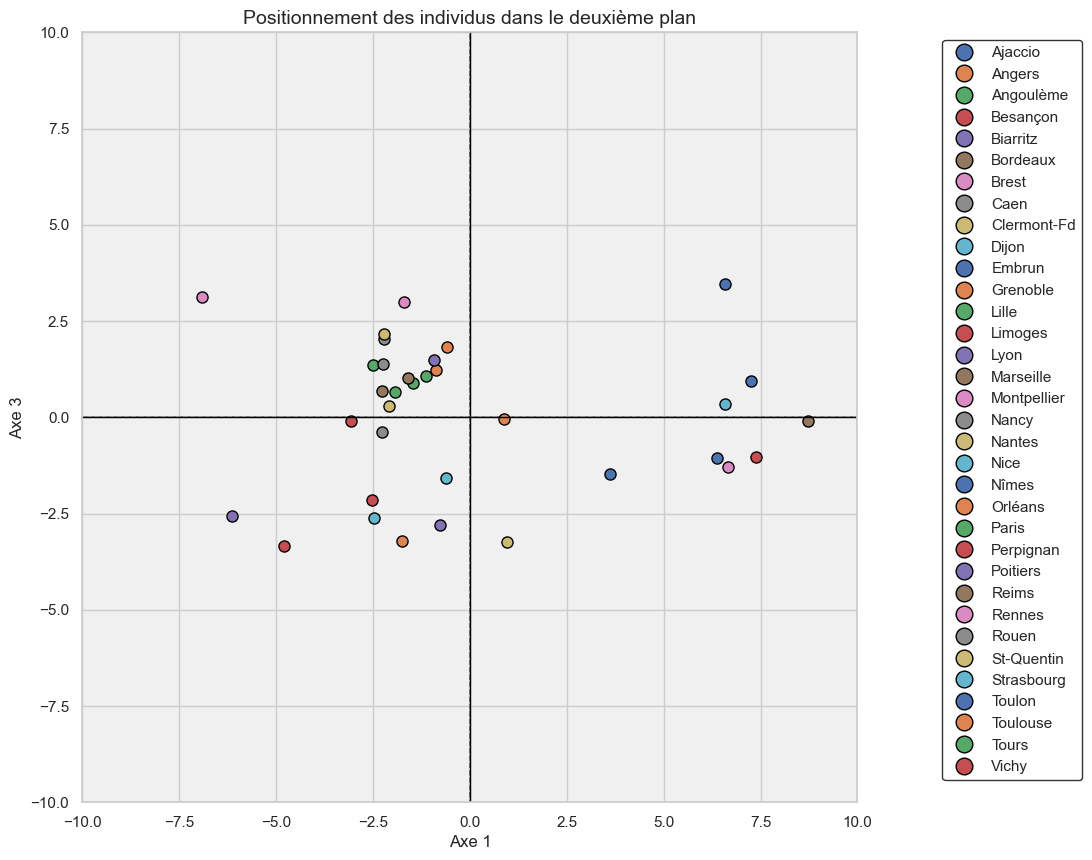

In [32]:
# Positionnement des individus dans le deuxième plan
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-10, 10)
axes.set_ylim(-10, 10)

# Ajouter un fond coloré pour le graphique
axes.set_facecolor('#f0f0f0')

# Ajouter des cercles pour mettre en évidence les individus
for i, (x, y) in enumerate(zip(coord[:, 0], coord[:, 2])):
    axes.plot(x, y, 'o', markersize=8, label=data.index[i], markeredgecolor='black', markeredgewidth=1)

# Ajouter des axes avec des flèches
axes.arrow(0, -10, 0, 20, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')
axes.arrow(-10, 0, 20, 0, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')

# Ajouter des lignes d'axe
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.axvline(0, color='black', linestyle='-', linewidth=1)

# Ajouter une légende pour les individus
axes.legend(loc='upper right', bbox_to_anchor=(1.3, 1), markerscale=1.5, frameon=True, edgecolor='black')

# Titres et labels
axes.set_title("Positionnement des individus dans le deuxième plan", fontsize=14)
axes.set_xlabel("Axe 1", fontsize=12)
axes.set_ylabel("Axe 3", fontsize=12)  # Modifier le label de l'axe Y en conséquence

# Affichage du graphique
plt.grid(True)
plt.show()


<h4>Représentation des individus dans le troisième plan<h4>

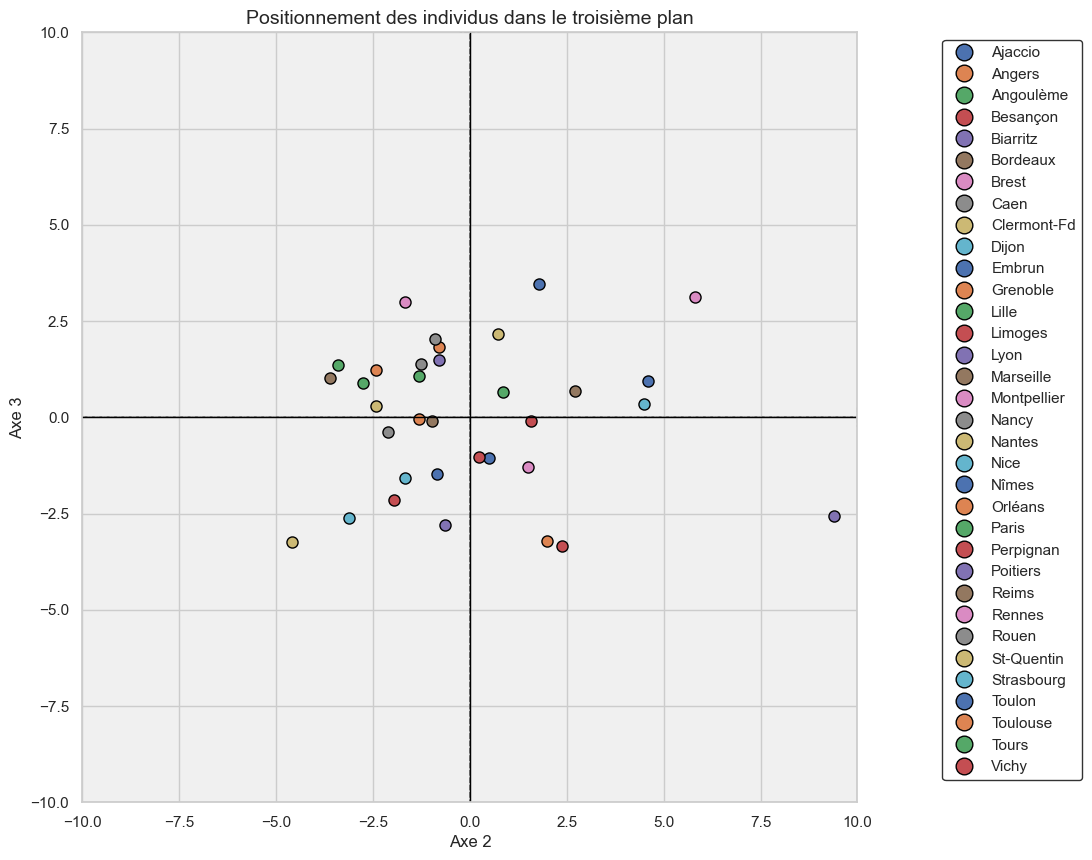

In [34]:
# Positionnement des individus dans le troisième plan
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-10, 10)
axes.set_ylim(-10, 10)

# Ajouter un fond coloré pour le graphique
axes.set_facecolor('#f0f0f0')

# Ajouter des cercles pour mettre en évidence les individus
for i, (x, y) in enumerate(zip(coord[:, 1], coord[:, 2])):
    axes.plot(x, y, 'o', markersize=8, label=data.index[i], markeredgecolor='black', markeredgewidth=1)

# Ajouter des axes avec des flèches
axes.arrow(0, -10, 0, 20, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')
axes.arrow(-10, 0, 20, 0, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')

# Ajouter des lignes d'axe
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.axvline(0, color='black', linestyle='-', linewidth=1)

# Ajouter une légende pour les individus
axes.legend(loc='upper right', bbox_to_anchor=(1.3, 1), markerscale=1.5, frameon=True, edgecolor='black')

# Titres et labels
axes.set_title("Positionnement des individus dans le troisième plan", fontsize=14)
axes.set_xlabel("Axe 2", fontsize=12)  # Modifier le label de l'axe X en conséquence
axes.set_ylabel("Axe 3", fontsize=12)  # Modifier le label de l'axe Y en conséquence

# Affichage du graphique
plt.grid(True)
plt.show()

<h3>CONTRIBUTION DES INDIVIDUS DANS L'INERTIE TOTALE</h3>

In [37]:
#Filtrer les individus avec d_i > à la moyenne de d_i
#Afficher les ID des ces individus
#contribution des individus dans l'inertie totale
di = np.sum(m**2,axis=1)
df_ctr_ind = pd.DataFrame({'ID':data.index,'contribution':di})
df_ctr_ind 
#Individus qui contribuent le plus à l'inertie totale
df_ctr_ind[df_ctr_ind['contribution'] > df_ctr_ind.contribution.mean()]


,ID,contribution
0,Ajaccio,64.098578
3,Besançon,42.218978
4,Biarritz,136.372614
6,Brest,93.665813
8,Clermont-Fd,39.094149
15,Marseille,78.917666
16,Montpellier,53.018155
19,Nice,67.760771
20,Nîmes,44.257999
23,Perpignan,60.921171


<h3>CONTRIBUTION DES INDIVIDUS AUX AXES DU PREMIER PLAN</h3>

In [38]:
#Contributions des individus aux axes du premier plan
eigval = (31-1)/31*acp.explained_variance_

ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*eigval[j])

df_ctr_cp1cp2 = pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
#Garder les individus interprétables du premier axe du premier plan
df_ctr_cp1cp2[df_ctr_cp1cp2['CTR_1'] > df_ctr_cp1cp2.CTR_1.mean()]
#Garder les individus interprétables du deuxième axe du premier plan
df_ctr_cp1cp2[df_ctr_cp1cp2['CTR_2'] > df_ctr_cp1cp2.CTR_2.mean()]

,id,CTR_1,CTR_2
4,Biarritz,0.075048,0.337077
6,Brest,0.095055,0.129165
8,Clermont-Fd,0.001845,0.080210
12,Lille,0.012297,0.044418
19,Nice,0.085824,0.077267
25,Reims,0.005053,0.049481
29,Strasbourg,0.012021,0.037484
30,Toulon,0.104365,0.081119


<h3>CONTRIBUTION DES INDIVIDUS AUX AXES DU DEUXIEME PLAN</h3>

In [40]:
#Contributions des individus aux axes du deuxième plan
eigval = (31-1)/31*acp.explained_variance_

ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*eigval[j])

df_ctr_cp1cp3 = pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_3':ctr[:,2]})
#Garder les individus interprétables du premier axe du deuxième plan
df_ctr_cp1cp3[df_ctr_cp1cp2['CTR_1'] > df_ctr_cp1cp2.CTR_1.mean()]
#Garder les individus interprétables du deuxième axe du deuxième plan
df_ctr_cp1cp3[df_ctr_cp1cp3['CTR_3'] > df_ctr_cp1cp3.CTR_3.mean()]

,id,CTR_1,CTR_3
0,Ajaccio,0.086199,0.108568
3,Besançon,0.045453,0.101319
4,Biarritz,0.075048,0.059205
6,Brest,0.095055,0.088417
7,Caen,0.009655,0.036945
8,Clermont-Fd,0.001845,0.094426
11,Grenoble,0.006027,0.092968
14,Lyon,0.001208,0.071256
18,Nantes,0.009758,0.042122
26,Rennes,0.005671,0.081549


<h3>CONTRIBUTION DES INDIVIDUS AUX AXES DU TROIXIEME PLAN</h3>

In [42]:
#Contributions des individus aux axes du troisième plan
eigval = (31-1)/31*acp.explained_variance_

ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*eigval[j])

df_ctr_cp2cp3 = pd.DataFrame({'id':data.index,'CTR_2':ctr[:,1],'CTR_3':ctr[:,2]})
#Garder les individus interprétables du premier axe du troisième plan
df_ctr_cp2cp3[df_ctr_cp2cp3['CTR_2'] > df_ctr_cp2cp3.CTR_2.mean()]
#Garder les individus interpretable du deuxième axe du troisième plan
df_ctr_cp2cp3[df_ctr_cp2cp3['CTR_3'] > df_ctr_cp2cp3.CTR_3.mean()]

,id,CTR_2,CTR_3
0,Ajaccio,0.012307,0.108568
3,Besançon,0.021545,0.101319
4,Biarritz,0.337077,0.059205
6,Brest,0.129165,0.088417
7,Caen,0.003024,0.036945
8,Clermont-Fd,0.080210,0.094426
11,Grenoble,0.015158,0.092968
14,Lyon,0.001546,0.071256
18,Nantes,0.002078,0.042122
26,Rennes,0.010663,0.081549
